# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import math
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, RobustScaler

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option("future.no_silent_downcasting", True)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here

df_train = pd.read_csv("data.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
"""
PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.
Age - The age of the passenger.
VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
Name - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
"""

"\nPassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.\nHomePlanet - The planet the passenger departed from, typically their planet of permanent residence.\nCryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.\nCabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.\nDestination - The planet the passenger will be debarking to.\nAge - The age of the passenger.\nVIP - Whether the passenger has paid for special VIP service during the voyage.\nRoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.\nName - The first a

In [4]:
#Type your code here
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df_train.describe()

In [6]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [7]:
df_train.shape

(8693, 14)

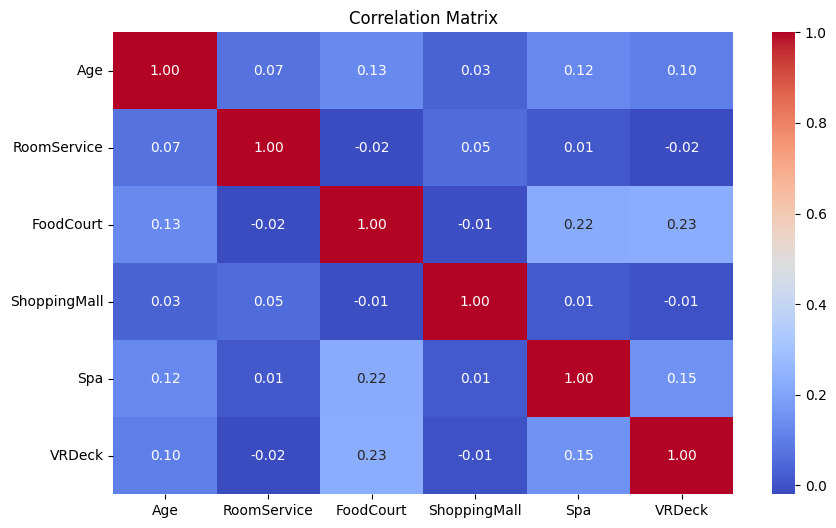

In [8]:
df_numeric = df_train.select_dtypes(include=['float64', 'int64'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

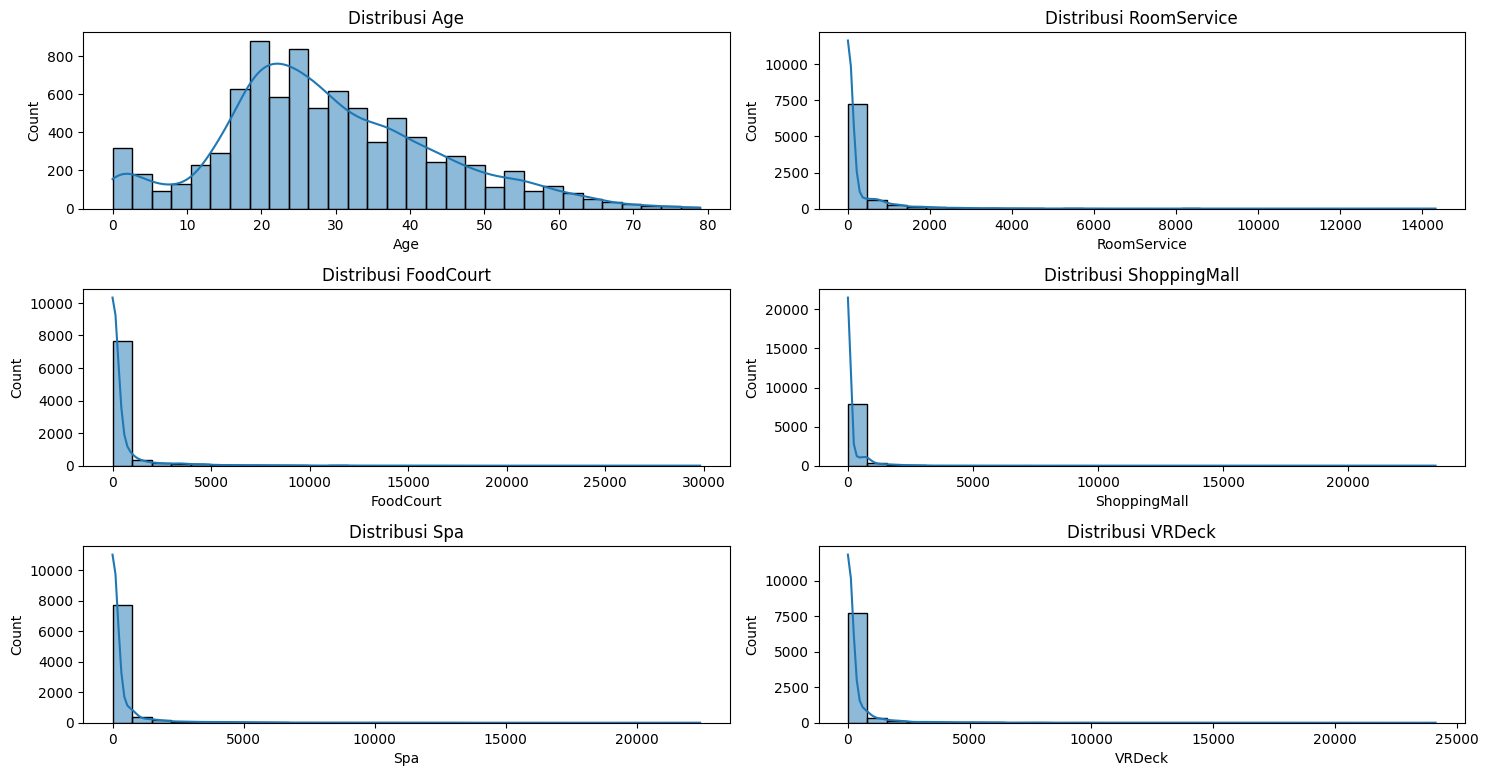

In [9]:
numerical_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_train.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols)//2 + 1, 2, i)
    sns.histplot(df_train[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

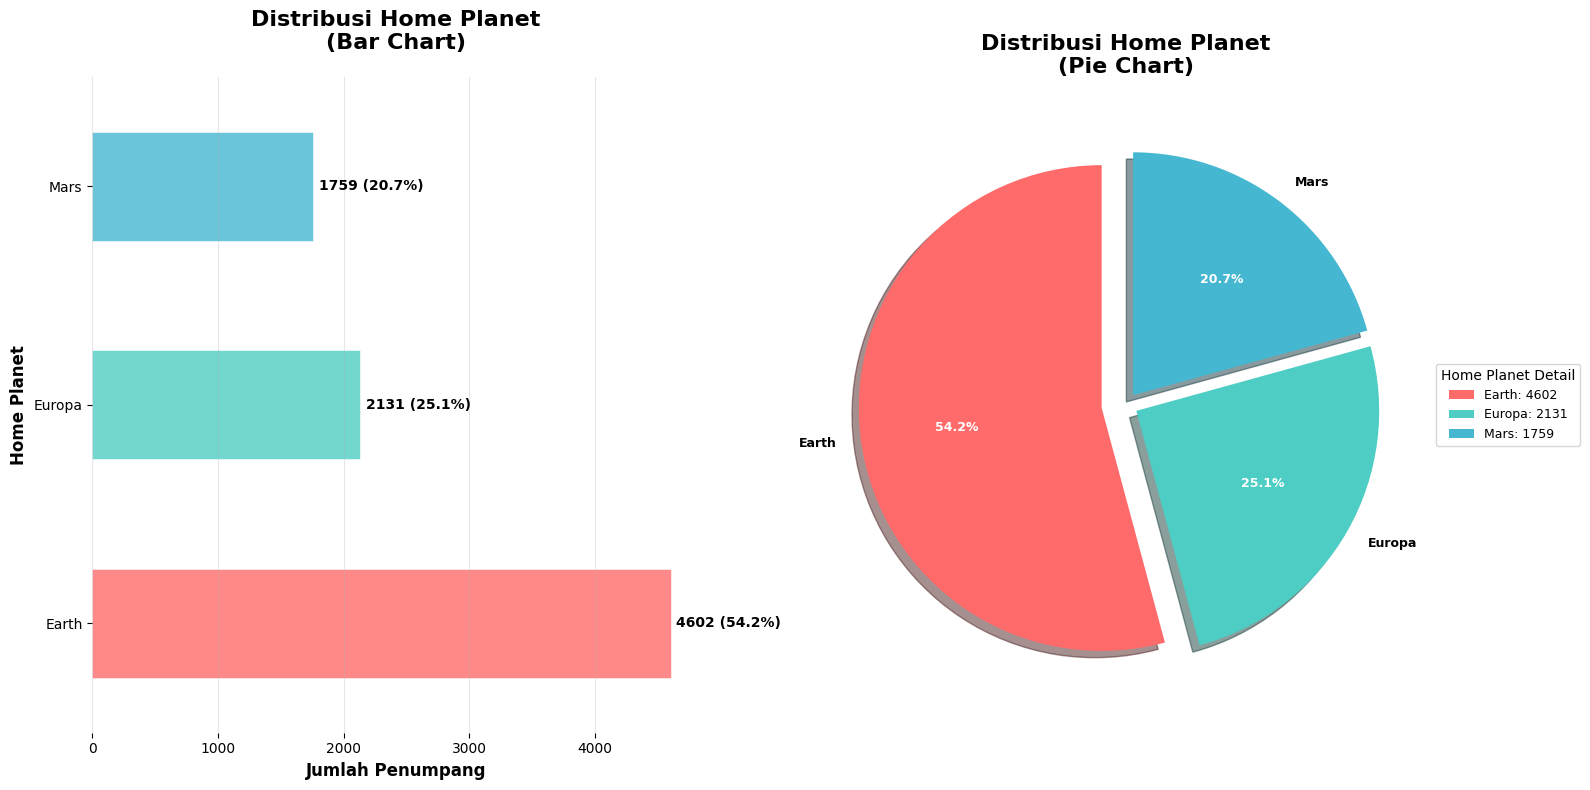

In [10]:
occupation_counts = df_train['HomePlanet'].value_counts()

plt.style.use('default')
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD',
          '#FFB6C1', '#98FB98', '#F0E68C', '#87CEEB', '#DEB887', '#F4A460']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

occupation_counts.plot(kind='barh', ax=ax1,
                      color=colors[:len(occupation_counts)],
                      alpha=0.8,
                      edgecolor='white',
                      linewidth=0.5)

for spine in ax1.spines.values():
    spine.set_visible(False)

ax1.set_title('Distribusi Home Planet\n(Bar Chart)',
             fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Jumlah Penumpang', fontsize=12, fontweight='bold')
ax1.set_ylabel('Home Planet', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

for i, (occupation, count) in enumerate(occupation_counts.items()):
    percentage = (count / occupation_counts.sum()) * 100
    ax1.text(count + max(occupation_counts) * 0.01, i,
            f'{count} ({percentage:.1f}%)',
            va='center', fontsize=10, fontweight='bold')

explode = [0.1 if i == 0 else 0.05 if i < 3 else 0 for i in range(len(occupation_counts))]

wedges, texts, autotexts = ax2.pie(occupation_counts.values,
                                  labels=occupation_counts.index,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  colors=colors[:len(occupation_counts)],
                                  explode=explode,
                                  shadow=True,
                                  textprops={'fontsize': 10, 'fontweight': 'bold'})

ax2.set_title('Distribusi Home Planet\n(Pie Chart)',
             fontsize=16, fontweight='bold', pad=20)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(9)
    autotext.set_fontweight('bold')

for text in texts:
    text.set_fontsize(9)
    text.set_fontweight('bold')

ax2.legend(wedges, [f'{occ}: {count}' for occ, count in occupation_counts.items()],
          title="Home Planet Detail",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=9)

plt.tight_layout()
plt.show()

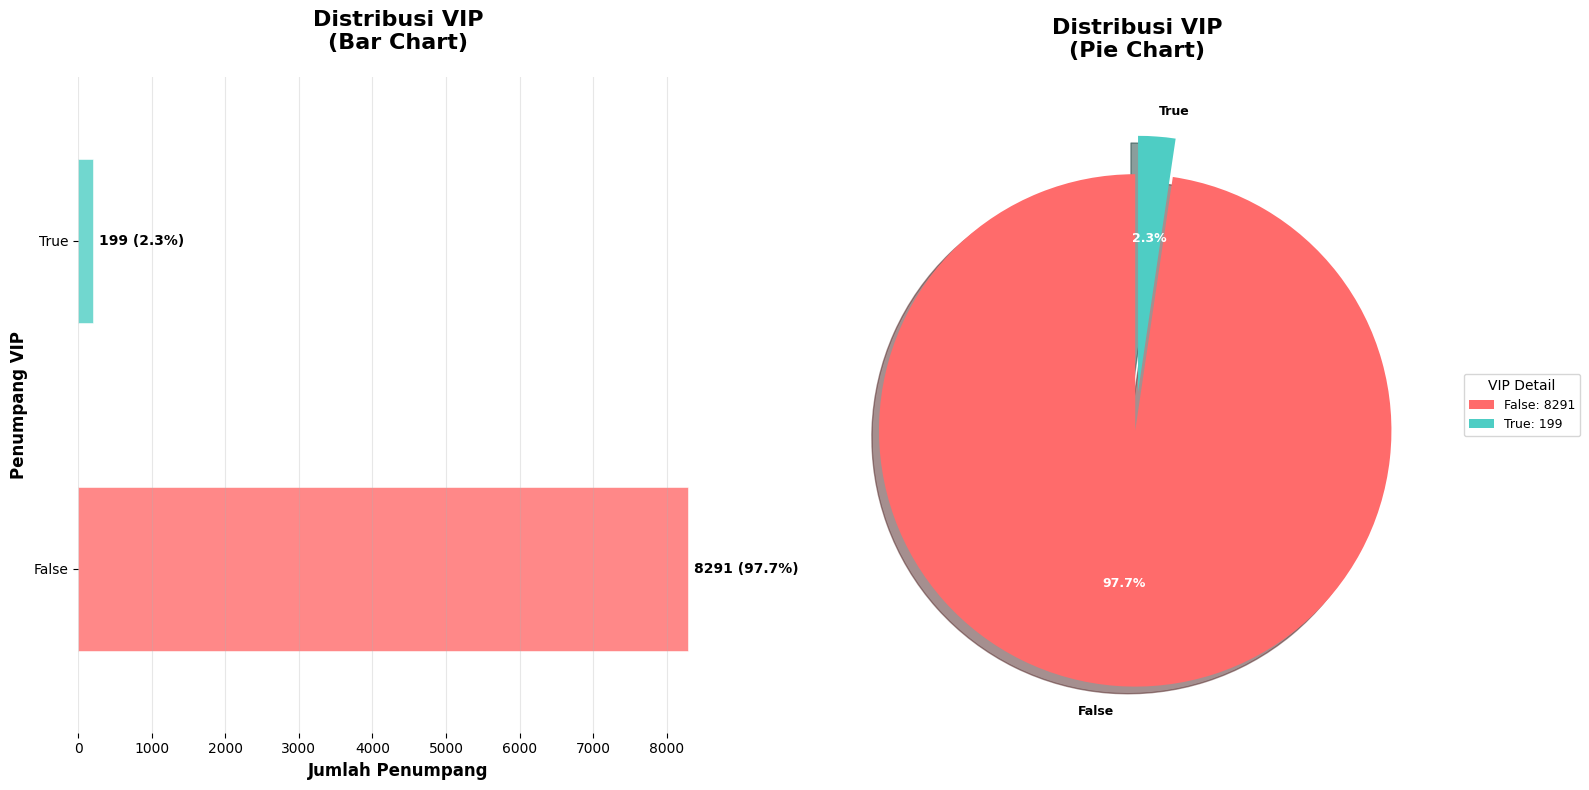

In [11]:
occupation_counts = df_train['VIP'].value_counts()

plt.style.use('default')
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD',
          '#FFB6C1', '#98FB98', '#F0E68C', '#87CEEB', '#DEB887', '#F4A460']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

occupation_counts.plot(kind='barh', ax=ax1,
                      color=colors[:len(occupation_counts)],
                      alpha=0.8,
                      edgecolor='white',
                      linewidth=0.5)

for spine in ax1.spines.values():
    spine.set_visible(False)

ax1.set_title('Distribusi VIP\n(Bar Chart)',
             fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Jumlah Penumpang', fontsize=12, fontweight='bold')
ax1.set_ylabel('Penumpang VIP', fontsize=12, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)

for i, (occupation, count) in enumerate(occupation_counts.items()):
    percentage = (count / occupation_counts.sum()) * 100
    ax1.text(count + max(occupation_counts) * 0.01, i,
            f'{count} ({percentage:.1f}%)',
            va='center', fontsize=10, fontweight='bold')

explode = [0.1 if i == 0 else 0.05 if i < 3 else 0 for i in range(len(occupation_counts))]

wedges, texts, autotexts = ax2.pie(occupation_counts.values,
                                  labels=occupation_counts.index,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  colors=colors[:len(occupation_counts)],
                                  explode=explode,
                                  shadow=True,
                                  textprops={'fontsize': 10, 'fontweight': 'bold'})

ax2.set_title('Distribusi VIP\n(Pie Chart)',
             fontsize=16, fontweight='bold', pad=20)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(9)
    autotext.set_fontweight('bold')

for text in texts:
    text.set_fontsize(9)
    text.set_fontweight('bold')

ax2.legend(wedges, [f'{occ}: {count}' for occ, count in occupation_counts.items()],
          title="VIP Detail",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=9)

plt.tight_layout()
plt.show()

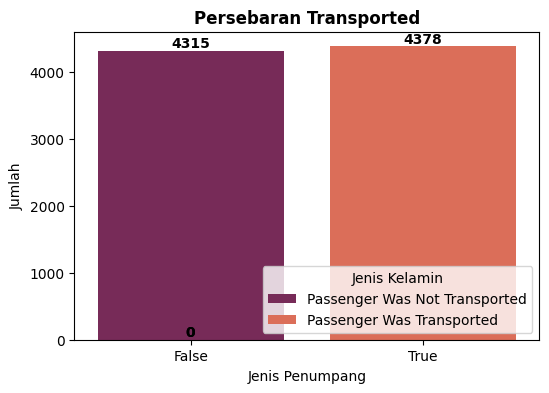

In [12]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="Transported", hue="Transported", data=df_train, palette="rocket")

for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold'
    )

plt.title("Persebaran Transported", fontsize=12, fontweight='bold')
plt.xlabel("Jenis Penumpang", fontsize=10)
plt.ylabel("Jumlah", fontsize=10)
plt.legend(title="Jenis Kelamin", labels=["Passenger Was Not Transported", "Passenger Was Transported"])

plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Missing Values

In [13]:
df_train.isnull().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [14]:
"""
PassengerId & Name

- Keduanya adalah identifier unik, jadi tidak bisa diisi dengan mean/modus.
- Kalau hilang → baris tidak valid → lebih baik hapus baris.

Transported (target label)

- Kalau target hilang, tidak bisa dipakai buat training.
- Jadi wajib hapus baris yang NaN.

Kolom kategori (HomePlanet, CryoSleep, Cabin, Destination, VIP)

- Tidak bisa diisi dengan mean.
- Solusi umum → isi dengan modus (nilai paling sering) atau "Unknown".
- Tujuannya biar tidak buang banyak data.

Kolom numerik (Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)

- Hilang bisa diisi dengan mean/median supaya distribusi data tetap terjaga.
- Median lebih aman kalau ada outlier, mean kalau distribusi relatif normal.
"""

'\nPassengerId & Name\n\n- Keduanya adalah identifier unik, jadi tidak bisa diisi dengan mean/modus.\n- Kalau hilang → baris tidak valid → lebih baik hapus baris.\n\nTransported (target label)\n\n- Kalau target hilang, tidak bisa dipakai buat training.\n- Jadi wajib hapus baris yang NaN.\n\nKolom kategori (HomePlanet, CryoSleep, Cabin, Destination, VIP)\n\n- Tidak bisa diisi dengan mean.\n- Solusi umum → isi dengan modus (nilai paling sering) atau "Unknown".\n- Tujuannya biar tidak buang banyak data.\n\nKolom numerik (Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)\n\n- Hilang bisa diisi dengan mean/median supaya distribusi data tetap terjaga.\n- Median lebih aman kalau ada outlier, mean kalau distribusi relatif normal.\n'

In [15]:
df_train = df_train.dropna(subset=['PassengerId', 'Name', 'Transported'])

In [16]:
numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for col in numeric_cols:
    df_train[col] = df_train[col].fillna(df_train[col].median())

In [17]:
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

for col in categorical_cols:
    fill_value = df_train[col].mode()[0] if not df_train[col].mode().empty else "Unknown"
    df_train[col] = df_train[col].fillna(fill_value).astype("string")

In [18]:
df_train.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [19]:
df_train.shape

(8493, 14)

In [20]:
df_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [21]:
df_train['Transported'].value_counts()

,count
Transported,
True,4277
False,4216


## Data Duplicate

In [22]:
df_train.duplicated().sum()

np.int64(0)

## Feature Engineering

In [23]:
df_train['GroupId'] = df_train['PassengerId'].apply(lambda x: x.split('_')[0])
df_train['GroupSize'] = df_train.groupby('GroupId')['PassengerId'].transform('count')
df_train['SoloTraveler'] = (df_train['GroupSize'] == 1).astype(int)

In [24]:
df_train[['Deck','CabinNum','Side']] = df_train['Cabin'].str.split('/', expand=True)
df_train['CabinNum'] = pd.to_numeric(df_train['CabinNum'], errors='coerce')

In [25]:
df_train['TotalSpend'] = df_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)
df_train['NoSpend'] = (df_train['TotalSpend'] == 0).astype(int)

In [26]:
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=[0, 12, 18, 25, 40, 60, 80],
                        labels=['Child','Teen','YoungAdult','Adult','MiddleAge','Senior'])

In [27]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Transported,GroupId,GroupSize,SoloTraveler,Deck,CabinNum,Side,TotalSpend,NoSpend,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,False,0001,1,1,B,0,P,0.0,1,Adult
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,0002,1,1,F,0,S,736.0,0,YoungAdult
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,False,0003,2,0,A,0,S,10383.0,0,MiddleAge
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,False,0003,2,0,A,0,S,5176.0,0,Adult
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,True,0004,1,1,F,1,S,1091.0,0,Teen


## Normalisasi atau Standarisasi Fitur

In [28]:
df_train = df_train.drop(columns=["PassengerId", "GroupId"])
numeric_cols = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "NoSpend", "TotalSpend", "CabinNum", "SoloTraveler", "GroupSize"]

In [29]:
for col in numeric_cols:
    df_train[col] = np.log1p(df_train[col])

In [30]:
scalers = {}

for col in numeric_cols:
    scaler = RobustScaler()
    df_train[col] = scaler.fit_transform(df_train[[col]])
    scalers[col] = scaler

In [31]:
scalers

{'Age': RobustScaler(),
 'RoomService': RobustScaler(),
 'FoodCourt': RobustScaler(),
 'ShoppingMall': RobustScaler(),
 'Spa': RobustScaler(),
 'VRDeck': RobustScaler(),
 'NoSpend': RobustScaler(),
 'TotalSpend': RobustScaler(),
 'CabinNum': RobustScaler(),
 'SoloTraveler': RobustScaler(),
 'GroupSize': RobustScaler()}

In [32]:
df_train[numeric_cols].head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,NoSpend,TotalSpend,CabinNum,SoloTraveler,GroupSize
0,0.601411,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,-0.904200,-3.519933,0.0,0.0
1,-0.191090,1.265757,0.555759,1.039101,1.581836,1.025068,0.0,0.003783,-3.519933,0.0,0.0
2,1.256750,1.019016,1.974901,0.000000,2.209146,1.053439,0.0,0.367582,-3.519933,-1.0,1.0
3,0.327378,0.000000,1.727613,1.887707,2.033282,1.418542,0.0,0.271863,-3.519933,-1.0,1.0
4,-0.841379,1.539496,1.028854,1.602261,1.589025,0.295837,0.0,0.057853,-3.120566,0.0,0.0


In [33]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Name,Transported,GroupSize,SoloTraveler,Deck,CabinNum,Side,TotalSpend,NoSpend,AgeGroup
0,Europa,False,B/0/P,TRAPPIST-1e,0.601411,False,0.000000,0.000000,0.000000,0.000000,...,Maham Ofracculy,False,0.0,0.0,B,-3.519933,P,-0.904200,1.0,Adult
1,Earth,False,F/0/S,TRAPPIST-1e,-0.191090,False,1.265757,0.555759,1.039101,1.581836,...,Juanna Vines,True,0.0,0.0,F,-3.519933,S,0.003783,0.0,YoungAdult
2,Europa,False,A/0/S,TRAPPIST-1e,1.256750,True,1.019016,1.974901,0.000000,2.209146,...,Altark Susent,False,1.0,-1.0,A,-3.519933,S,0.367582,0.0,MiddleAge
3,Europa,False,A/0/S,TRAPPIST-1e,0.327378,False,0.000000,1.727613,1.887707,2.033282,...,Solam Susent,False,1.0,-1.0,A,-3.519933,S,0.271863,0.0,Adult
4,Earth,False,F/1/S,TRAPPIST-1e,-0.841379,False,1.539496,1.028854,1.602261,1.589025,...,Willy Santantines,True,0.0,0.0,F,-3.120566,S,0.057853,0.0,Teen


## Deteksi dan Penanganan Outlier

In [34]:
df_train.shape

(8493, 21)

In [35]:
numeric_cols

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'NoSpend',
 'TotalSpend',
 'CabinNum',
 'SoloTraveler',
 'GroupSize']

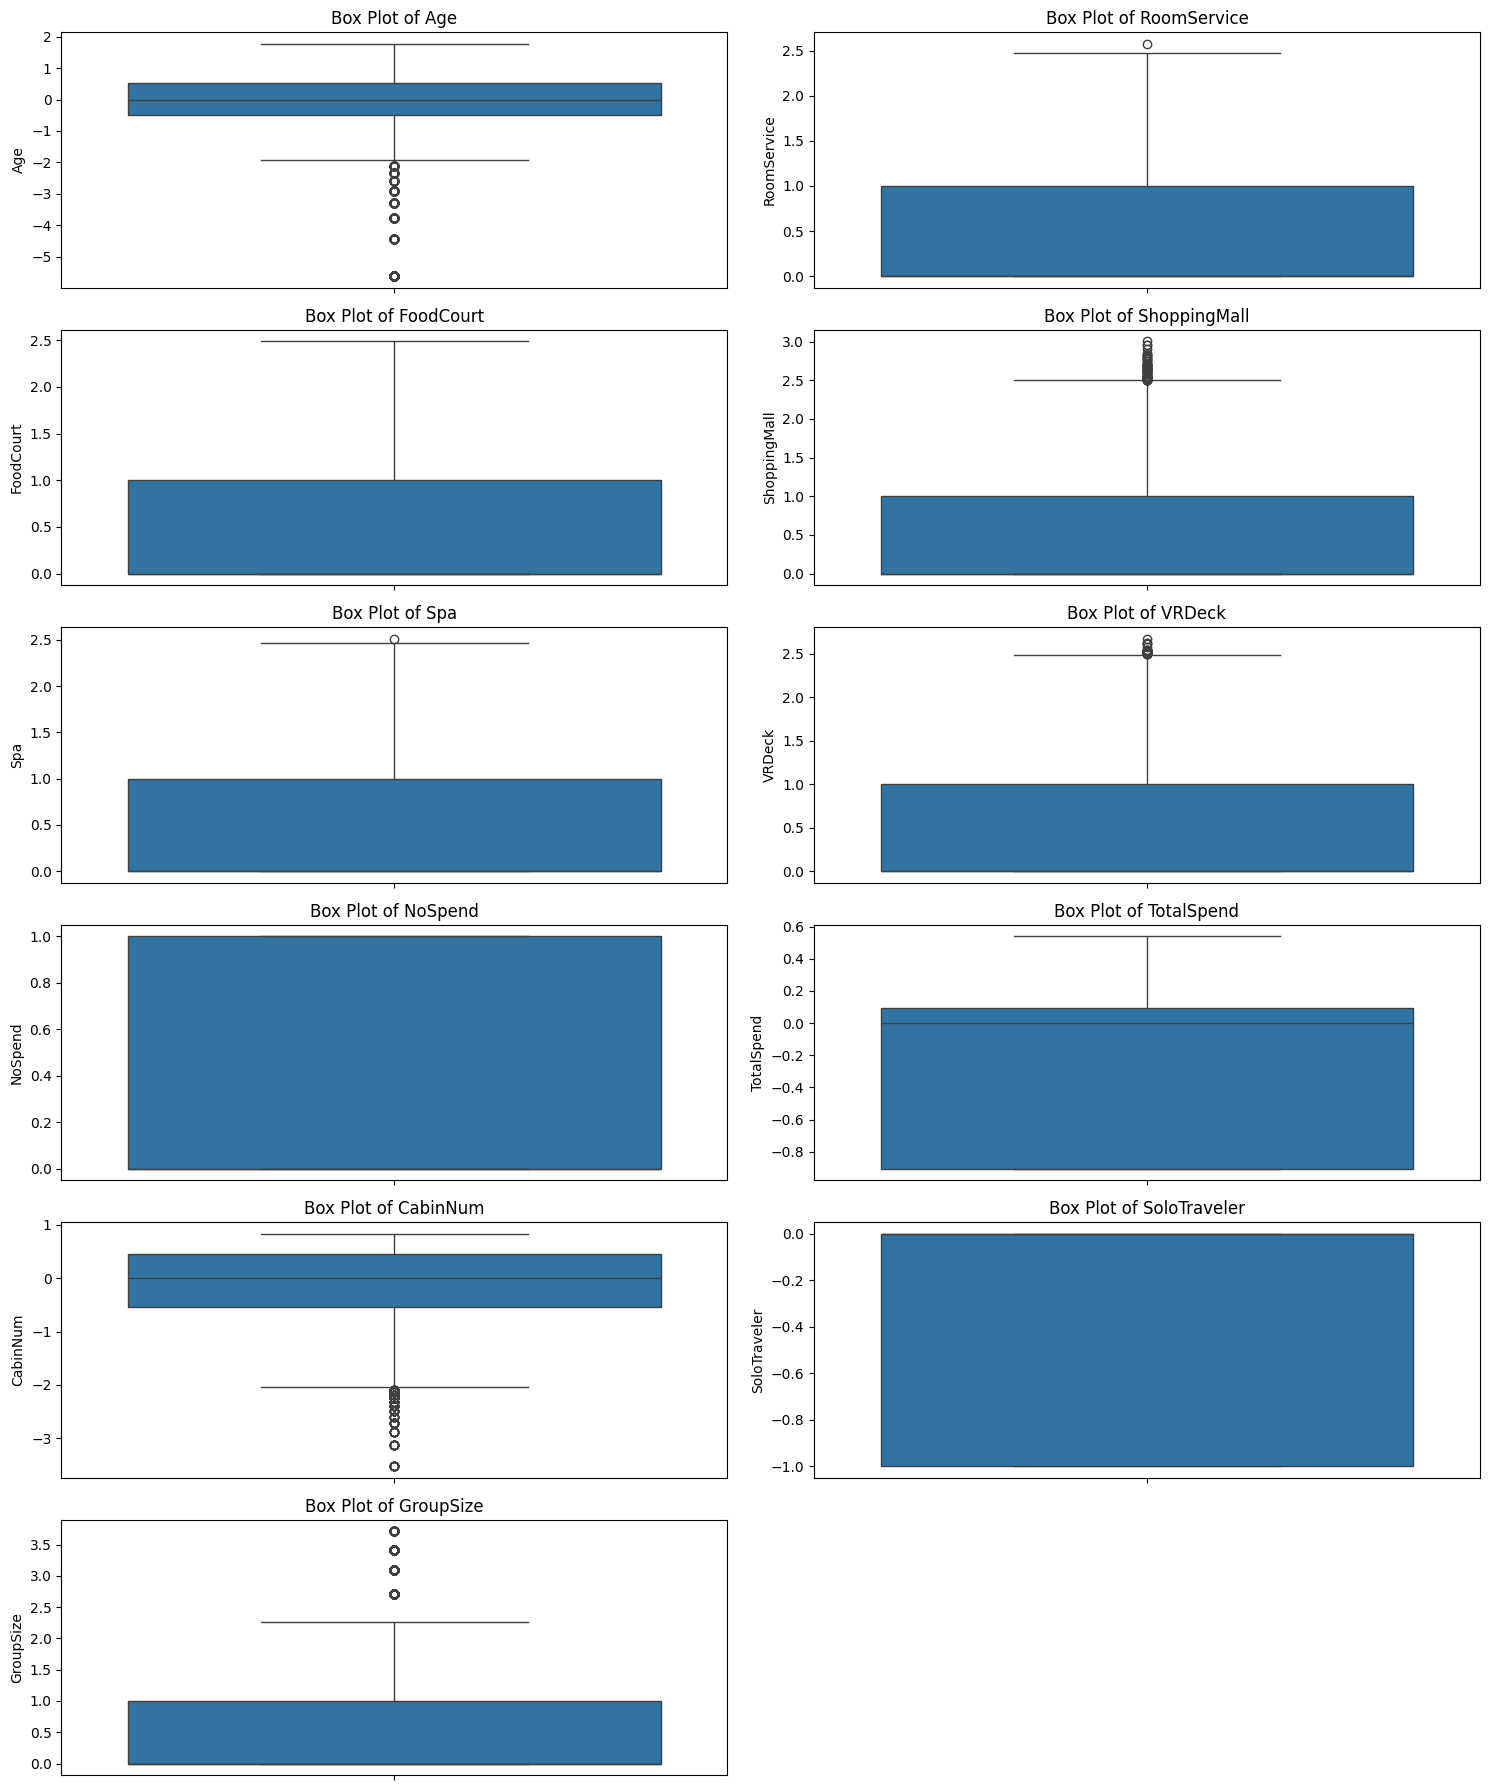

In [36]:
n_cols = len(numeric_cols)

n_rows = math.ceil(n_cols / 2)
n_cols_grid = 2

plt.figure(figsize=(15, 3 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols_grid, i + 1)
    sns.boxplot(y=df_train[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [37]:
Q1 = df_train[numeric_cols].quantile(0.25)
Q3 = df_train[numeric_cols].quantile(0.75)

In [38]:
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [39]:
df_train = df_train[
    ~((df_train[numeric_cols] < lower_bound) | (df_train[numeric_cols] > upper_bound)).any(axis=1)
]

In [40]:
df_train[numeric_cols].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,NoSpend,TotalSpend,CabinNum,SoloTraveler,GroupSize
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,0.082646,0.513551,0.481115,0.540620,0.492321,0.498497,0.372760,-0.277172,-0.097890,-0.359323,0.487572
std,0.670791,0.751499,0.710499,0.821341,0.702813,0.744541,0.483573,0.493179,0.646290,0.479835,0.706917
min,-1.913757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.904200,-2.042100,-1.000000,0.000000
25%,-0.406638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.904200,-0.512148,-1.000000,0.000000
50%,0.059170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009091,0.006999,0.000000,0.000000
75%,0.558721,1.196328,1.077906,1.136150,1.101646,1.093406,1.000000,0.097604,0.459496,0.000000,1.000000
max,1.770167,2.478048,2.486700,2.497476,2.464152,2.487384,1.000000,0.518331,0.828367,0.000000,2.259851


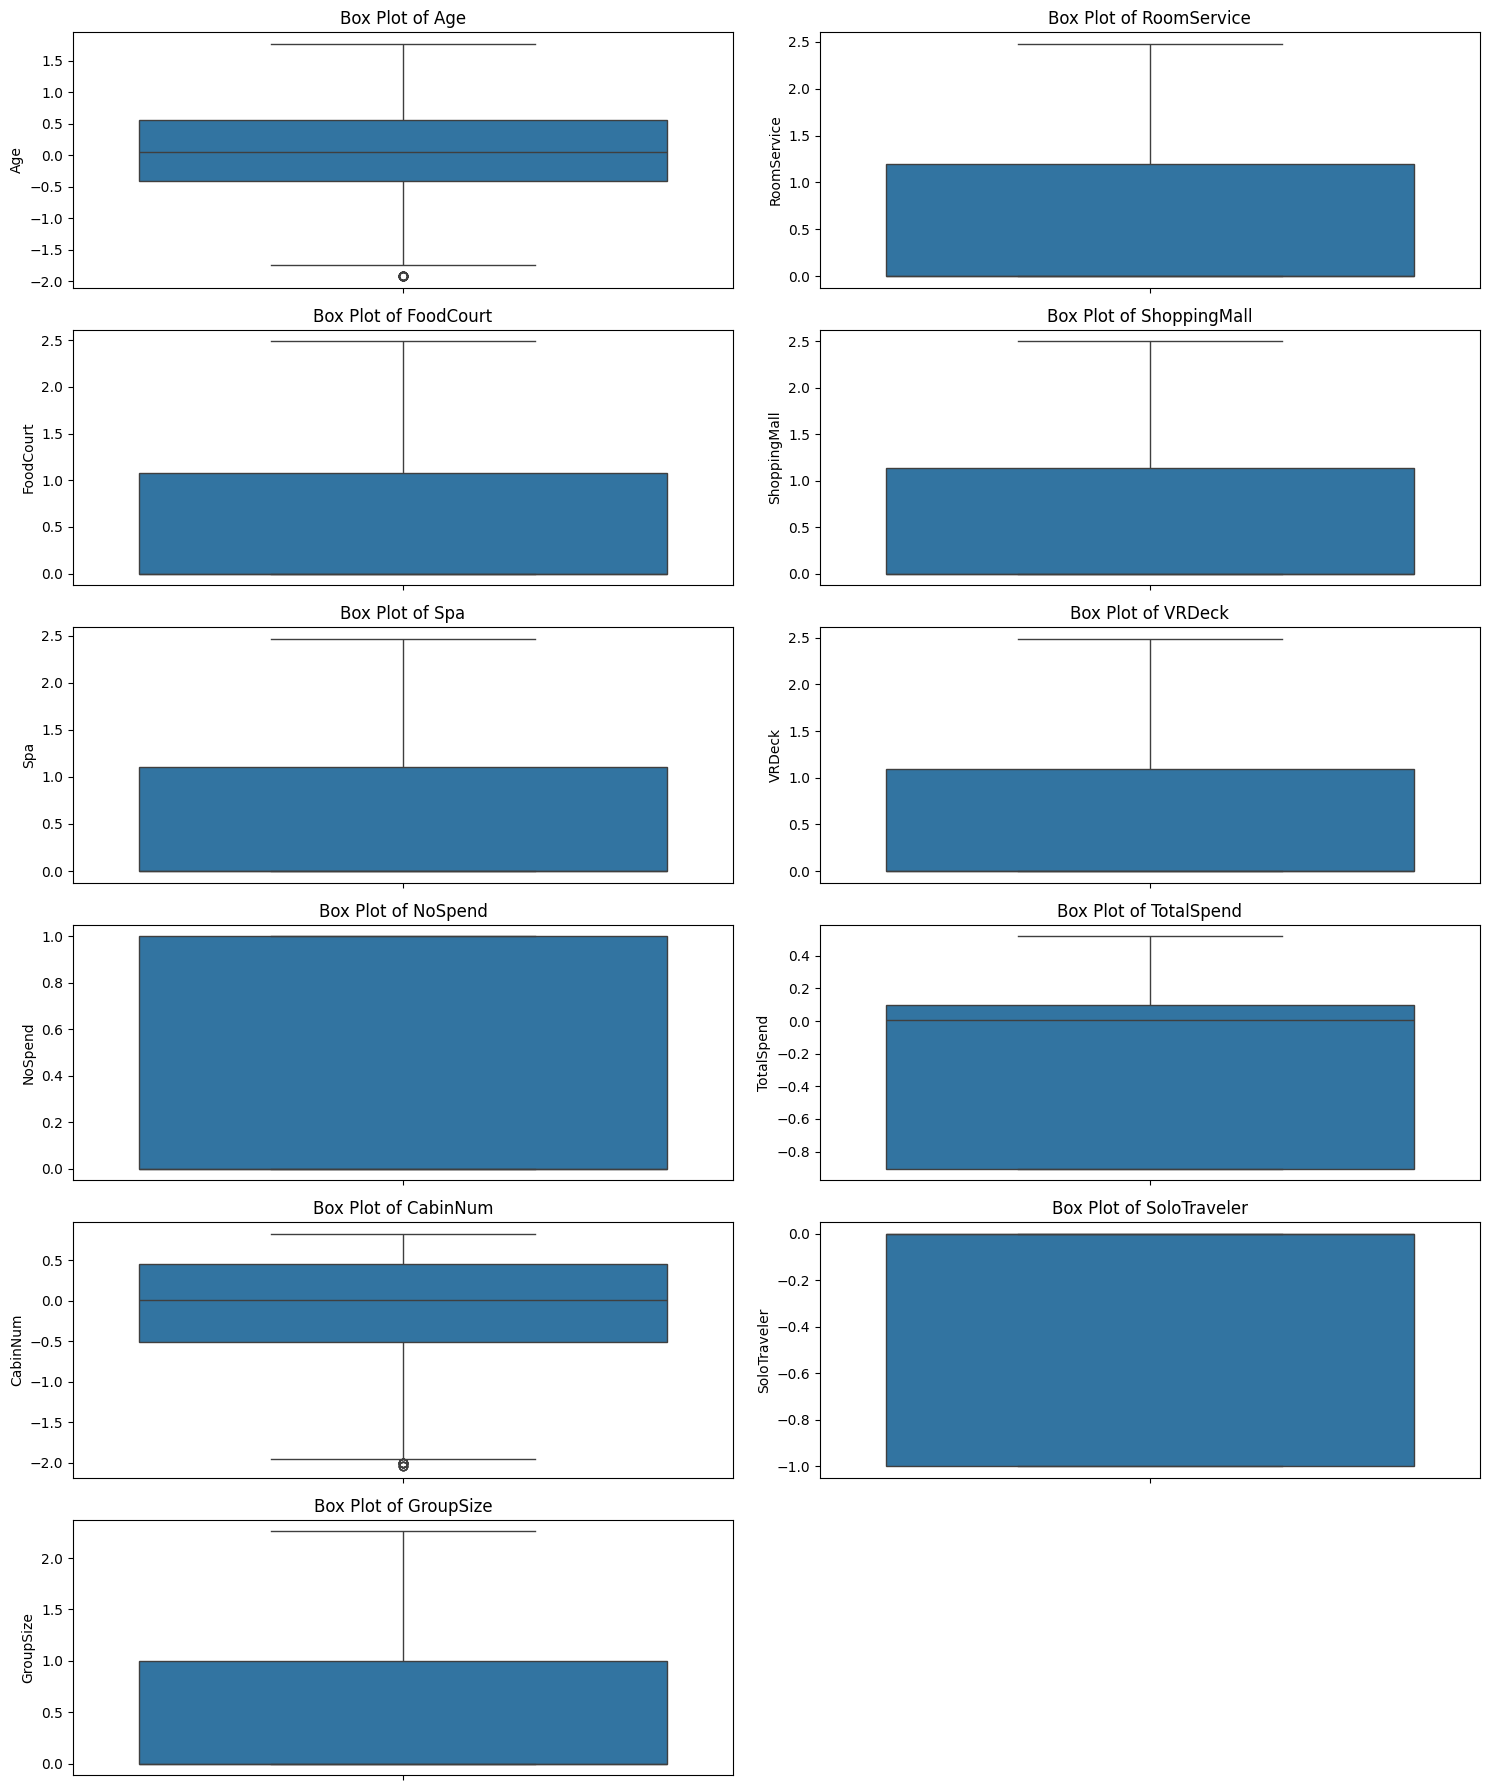

In [41]:
n_cols = len(numeric_cols)

n_rows = math.ceil(n_cols / 2)
n_cols_grid = 2

plt.figure(figsize=(15, 3 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols_grid, i + 1)
    sns.boxplot(y=df_train[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [42]:
df_train.shape

(7144, 21)

## Encoding Data Kategorikal

In [43]:
exclude_cols = numeric_cols
categorical_cols = [col for col in df_train.columns if col not in exclude_cols]
label_encoders = {}

for col in categorical_cols:
    encoder = LabelEncoder()
    df_train[col] = encoder.fit_transform(df_train[col].astype(str))
    label_encoders[col] = encoder

In [44]:
label_encoders

{'HomePlanet': LabelEncoder(),
 'CryoSleep': LabelEncoder(),
 'Cabin': LabelEncoder(),
 'Destination': LabelEncoder(),
 'VIP': LabelEncoder(),
 'Name': LabelEncoder(),
 'Transported': LabelEncoder(),
 'Deck': LabelEncoder(),
 'Side': LabelEncoder(),
 'AgeGroup': LabelEncoder()}

In [45]:
for col, encoder in label_encoders.items():
    print(f"{col}: {encoder.classes_}")

HomePlanet: ['Earth' 'Europa' 'Mars']
CryoSleep: ['False' 'True']
Cabin: ['A/100/S' 'A/101/S' 'A/102/S' ... 'G/998/S' 'G/999/P' 'G/999/S']
Destination: ['55 Cancri e' 'PSO J318.5-22' 'TRAPPIST-1e']
VIP: ['False' 'True']
Name: ['Aard Curle' 'Aarjel Jaff' 'Aarjel Rhuba' ... 'Zosmas Mormonized'
 'Zubeneb Flesping' 'Zubeneb Pasharne']
Transported: ['False' 'True']
Deck: ['A' 'B' 'C' 'D' 'E' 'F' 'G']
Side: ['P' 'S']
AgeGroup: ['Adult' 'Child' 'MiddleAge' 'Senior' 'Teen' 'YoungAdult']


In [46]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Name,Transported,GroupSize,SoloTraveler,Deck,CabinNum,Side,TotalSpend,NoSpend,AgeGroup
15,0,0,5637,2,0.225155,0,0.941548,0.000000,2.161225,0.000000,...,3794,0,0.000000,0.0,6,0.282680,1,0.032629,0.0,0
56,0,0,2246,2,-0.331685,0,1.030986,1.689623,1.595904,1.812088,...,5916,0,0.000000,0.0,5,-2.042100,1,0.180702,0.0,5
57,0,0,2388,2,1.367358,0,0.000000,1.541151,0.000000,0.724588,...,6124,0,0.000000,0.0,5,-1.999401,1,-0.016702,0.0,3
63,0,0,2653,0,-0.406638,0,2.039558,0.877979,0.000000,0.000000,...,6720,0,1.709511,-1.0,5,-1.922465,1,0.141620,0.0,5
66,0,0,2387,2,-0.567346,0,1.414345,0.000000,0.571444,0.173765,...,4610,0,0.000000,0.0,5,-1.999401,0,0.034731,0.0,5


## Save Data, Scaller, Label Encoder

In [47]:
df_train.to_csv("spaceship_titanic_preprocessing.csv")

In [50]:
for col, scalers in scalers.items():
    joblib.dump(scalers, f"{col}_scaler.pkl")

In [51]:
for col, encoder in label_encoders.items():
    joblib.dump(encoder, f"{col}_encoder.pkl")